# **MILESTONE 2 PHASE 2**

# **INTRODUCING**

Nama : Teza Marlevi Fajar

Batch : 11 

Refrensi :

https://www.kaggle.com/code/leabenzvi/cyberbullying-tweets-classification-word2vec

https://www.youtube.com/watch?v=kxeyoyrf2cM

https://www.kaggle.com/code/adiljadoon/word-cloud-with-python/notebook

## Assumption

Halo semuanya, perkenalkan saya Teza Marlevi Fajar dan saya adalah seoarang Data Scientist. Saya mempunyai klien dari sebuah lembaga Anti Bullying yang berada di negara Canada. Dalam kasus ini saya akan melakukan Text Categorization terhadap kasus Cyberbullying yang tersebar dari twitter.

## Business Understanding

Problems :

Organisasi Anti-Cyberbullying yang berada di negara Canada mempunyai masalah yang terjadi terus menerus, yaitu kesalahan dalam melakukan klasifikasi tweet yang tersebar khususnya didalam aplikasi Twitter. Seringkali organisasi tersebut mendapatkan data yang salah tentang sentiment tweet yang didapat dari twitter, ada beberapa tweet yang tidak termasuk dalam kata-kata yang bullying malah terdeteksi sebagai kata yang bersifat bullying jenis lain. Organisasi ini meminta saya untuk bisa menangani masalah tersebut.


Problem Solving :

Melihat dari kasus yang diterangkan oleh pihak organisasi tersebut saya tertaik untuk melakukan pembuatan model deep learning khususnya NLP. Berdasarkan masalah yang didapat oleh organisasi tersebut saya asumsikan kita akan meminamalisir False Negative dengan begitu saya akn melihat model berdasarkan Metrics Recall. Saya akan membuat 3 buah base model dan 3 buah model setelah improvement dan model yang saya gunakan kali ini adalah DNN, LSTM dan GRU.


# **IMPORTING LIBRARY**

Pada bagian ini kita akan melakukan importing library 

In [4]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from tensorflow.keras.layers import TextVectorization, Embedding
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, LSTM, GRU, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

NLTK Downloads

In [5]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# **DATA LOADING**

Dalam kasus ini saya akan melakukan loading dari dataset yang saya punya.

In [6]:
data = pd.read_csv('cyberbullying_tweets.csv')

# Display Dataset
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [7]:
# Display Dataset
data.tail()

,tweet_text,cyberbullying_type
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity


Membuat duplicate data

In [8]:
data_new = data.copy()

Setelah melakukan duplicate data, kita akan melihat value counts dari kolom `cyberbullying_type`

In [9]:
data['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

Berdasarkan hasil tersebut kita dapat melihat bahwa target kita tergolong masih balanced, selanjutnya kita akan melakukan cek dimensional dari data yang kita punya.

In [10]:
# Cek Dimensional

data.shape

(47692, 2)

dalam dataset ini kita mempunyai sebanyak 47692 baris dan 2 kolom, selanjutnya kita akan melakukan cek info terhadap dataset.

In [11]:
# Cek info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


Berdasarkan hasil info diatas, data yang kita punya mmepunyai type data object dan tidak terdapat missing value dalam dataset artinya kita tidak akan melakukan handling missing value.

## Data Cleaning

Melihat tweet yang duplicate

In [12]:
data[data.duplicated(keep='last')]

,tweet_text,cyberbullying_type
829,Our pancakes are selling like hotcakes Shaz - ...,not_cyberbullying
1712,This is the opportunity to prove ourselves lik...,not_cyberbullying
1984,@TVWEEKmag: There is only 1 way to stay in the...,not_cyberbullying
2611,It wouldn't be fair. Kat knows NOTHING of fair...,not_cyberbullying
3406,But you all respect him....Pete hasn't read tw...,not_cyberbullying
4391,Strategicscoring should be classed as cheating...,not_cyberbullying
5219,"If we're at the bottom of the leaderboard, we'...",not_cyberbullying
6358,@Ima_TV_Junkie: What the hell were Annie and L...,not_cyberbullying
7955,Simple things please simple minds. @pumpkinkin...,gender
8175,"girls @Dehner07 In usually not sexist, but gir...",gender


Seperti yang kita lihat ada beberapa dokumen(tweet) yang terdapat duplicate atau double dalam dataset ini. Dalam kasus ini saya akan menghapus kolom yang terdapat duplicate.

In [13]:
# Drop tweet yang duplicate

data.drop_duplicates(inplace=True)

Kita telah selesai melakukan drop terhadap tweet yang duplicate

# **EXPLORATORY DATA ANALYSIS**

pada bagian ini kita akan melakukan analysis terhadap data yang kita punya 

## Perbandingan Type Cyber Bullying

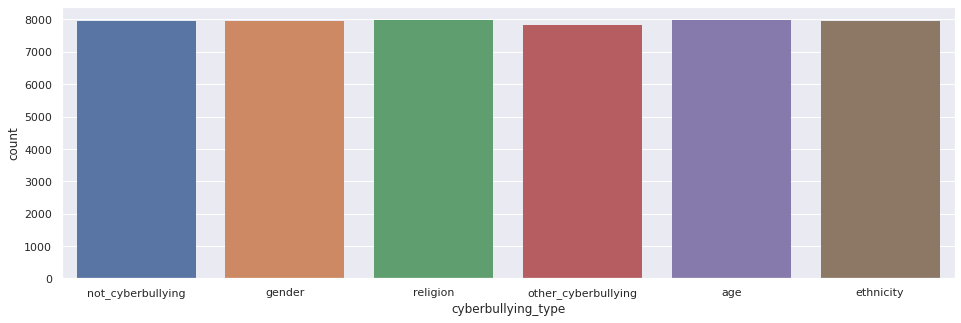

In [14]:
sns.set(rc={'figure.figsize':(16,5)})
sns.countplot(data=data, x='cyberbullying_type', linewidth=0)

In [15]:
data['cyberbullying_type'].value_counts()

religion               7997
age                    7992
ethnicity              7959
gender                 7948
not_cyberbullying      7937
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

Berdasarkan grafik diatas :

* Regilion memiliki tweet terbanyak dengan total 7997 
* Age memiliki total 7992 tweet
* Ethnicity dengan total 7959 tweet
* Cyber Bullying dengan type gender berada di urutan kempat dengan total 7948 tweet
* Tweet dengan type Not Cyber Bullying sebanyak 7937 
* other_cyberbullying memiliki skor terkecil dengan total 7823 tweet.

Kita bisa mengetahui bahwa bullying yang tertinggi berada di type Religion, ini sangat masuk akal karena di zaman sekarang banyak seklai yang membahas tentang agama tertentu untuk dijadikan bahan candaan, leluconan bahkan hinaan.

## Other Cyberbullying

Dalam type Cyber bullying dalam dataset ini terdapat tweet yang bertype `other cyberbullying`, tetapi kita tidak mengetahui apa yang dimaksud dengan type bullying tersebut, dan pada bagian ini kita akan melihat apa yang dimaksud dari `other cyberbullying` dalam tweet dataset ini.

In [16]:
other_bullying = data.query("cyberbullying_type == 'other_cyberbullying'").reset_index(drop=True)
other_bullying

,tweet_text,cyberbullying_type
0,"@ikralla fyi, it looks like I was caught by it...",other_cyberbullying
1,I need to just switch to an organization-based...,other_cyberbullying
2,RMAed my monoprice. Shoddy power bricks on tho...,other_cyberbullying
3,@murphy_slaw https://t.co/M8w8xnUnDL,other_cyberbullying
4,@1Life0Continues i've got the code to interpre...,other_cyberbullying
...,...,...
7818,"@kufr666 @blockbot no, that's @oolon",other_cyberbullying
7819,@AriMelber why are you giving these idiots air...,other_cyberbullying
7820,I am right now watching Enforcers defend Chums...,other_cyberbullying
7821,✨✨✨ misandry is not a word iOS can autocomplet...,other_cyberbullying


Kita akan melihat beberapa tweet dari Other Cyberbullying

In [17]:
# Menggunakan For loop

for i in range(1, 21):
    print(other_bullying['tweet_text'][i])

I need to just switch to an organization-based github, but I don't want to pay $25/month because I'm cheap. :\
RMAed my monoprice. Shoddy power bricks on those. Getting a refund and picking up another ASUS VG278HE. It's cheaper, anyways.
@murphy_slaw https://t.co/M8w8xnUnDL
@1Life0Continues i've got the code to interpret &amp; analyze, but the weights themselves are going to take a lot of fiddling.
@krainboltgreene didn't mention your name. i call out behavior, not people. &lt;3
RT @exokmv: i swear people are so fucking ignorant and annoying
Yeah, I've got a bit of a rageboner. Mentally speaking.
RT @Laralyn: Uh... wow. https://t.co/CdoNLaApVr
The morning after, hung over, struggling to remember how that pile of o'reilly books ended up in your bed. "WHAT DID I CODE LAST NIGHT"
#mkr heading into 2017 with another instant restaurant round
RT @BuzzFeedUK: When you accidentally open your front camera: http://t.co/gu35jqiPye
That #BegaCheese ad is SO old I'm wondering if the old digger is s

In [18]:
# Menggunakan For Loop

for i in range(21, 41):
    print(other_bullying['tweet_text'][i])

Sorry, I'm not going to say GamerGate is the same as ISIS, and you can shove your donation up your ass. @PeerWorker
It's really hard to talk about abuse &amp; leave it with a positive message. Call to action is important to not discourage women from industry.
@JillWetzler I ❤️ u
@cjcsuhta full blown redis is overkill for what I'm doing. Will try this out. :)
@mikeage what isn't? ;P
Just a reminder, this is the kind of logic &amp; reasoning that we've come to expect from GG: http://t.co/7RjxqC3ZsG
@JosephJ89 bully - pouts-
@ThePeePs2 I am not taking life advice from someone that doesn't know the diff between wear and ware
Leo was freaking out because of the wind, so I buried him in luggage so he could sleep. http://t.co/ekriu0a5pN
RT @wilkieii: The @InnovatingWomen account is literally @wadhwa retweeting himself talking for women in tech. Seriously. Look at it. #StopW…
If the judges didn't give their critique first, the other contestants wouldn't know what to say; they're just copying t

Setelah melihat beberapa sample dari tweet diatas, saya berasumsi bahwa tweet yang berstatus `Other Cyberbullying` merupakan tweet yang mengandung makna negatif, walaupun tidak melakukan bullying secara langsung tapi beberapa tweet tersebut mengandung makna yang negatif. Kesimpulannya adalah tweet yang berstatus `other cyberbullying` memiliki makna yang negatif dan kasar.

## Religion 

Kita akan melihat beberapa sample dalam type religion

In [19]:
religion_bullying = data.query("cyberbullying_type == 'religion'").reset_index(drop=True)

In [20]:
# Menggunakan For Loop

for i in range(1, 11):
    print(religion_bullying['tweet_text'][i])

@discerningmumin Islam has never been a resistance to oppression. It has always been source of oppression to both believers and non believer
Boy, your comment about Journalists wanting to keep churches closed is beneath you. As a Christian woman and human being your bosses filth is brushing off on you. Not at all unbiased and a down right lie. SHAME ON YOU.
@ShashiTharoor @INCIndia Hindus were and are getting killed by Muslims terriorists in Kashmir. Congress mukt bharat will certainly happen if congressmen like you don’t change their idealogies and keep sounding like idiots. You actually don’t need enemies.
White supremicists? How many do you know? There a few idiots in all races. Where is anti-semitism coming from? Dems, BLM, Antifa, Muslims. You won’t appease them by throwing white supremacy. They hate you &amp; want to destroy Israel &amp; all Jews &amp; you know it.
Urban naxal and a jihadi TT gang put together..wen more than 95% ot the population are happy to be united as one nat

Kita dapat mengetahui bahwa ada beberapa tweet yang mengandung unsur bullying terhadap agama.

## Karakter

kita akan melakukan cek terhadap kata yang mengandung http

In [21]:
data[data.tweet_text.str.contains('http')]

,tweet_text,cyberbullying_type
10,@Jord_Is_Dead http://t.co/UsQInYW5Gn,not_cyberbullying
11,The Bully flushes on KD http://twitvid.com/A2TNP,not_cyberbullying
13,RT @Kurdsnews: Turkish state has killed 241 ch...,not_cyberbullying
18,"Best pick up line? Hi, you're cute... ?: I lov...",not_cyberbullying
20,@halalcunty @biebervalue @liamxkiwi @greenline...,not_cyberbullying
...,...,...
47503,UMAD RT @The_April_Fool: Hey hoe how you doing...,ethnicity
47558,Scott's a dumb nigger. FUCK HIM. — Oh dear htt...,ethnicity
47588,pussy ass bitch dumb muthafuker like fuck u ni...,ethnicity
47605,"Anonymous asked: nicki minaj is a nigger, keit...",ethnicity


Berdasarkan hasil diatas kita bisa melihat bahwa ada 4346 tweet yang mengandung `http`, tweet tersebut akan kita lakukan remove punctuation.

Kita akan melihat text yang mempunyai panjang 1 sampai 10 karakter, kenapa saya melakukan hal ini? karena menurut saya di dalam dunia sosial media atau lebih tepatnya twitter dalam kasus ini seseorang yang melakukan tweet hanya menggunakan beberapa huruf saja merupakan karakter kata yang termasuk unique, dan ini bisa kita jadikan insight mengambil keputusan untuk kedepannya.

In [22]:
# Check 1 huruf

for i in data['tweet_text'] :
    if len(i) == 1 :
        print(i)

💩
.


In [23]:
# Cek 2 huruf

for i in data['tweet_text'] :
    if len(i) == 2 :
        print(i)

:D
♫♪


In [24]:
# Cek 3 huruf

for i in data['tweet_text'] :
    if len(i) == 3 :
        print(i)

FFS
♪♥♪
#M…
Ok.
Oh.
My.
:-)


In [25]:
# cek 4 huruf

for i in data['tweet_text'] :
    if len(i) == 4 :
        print(i)

#fat
Why?
ROFL
#mkr
God.
#MKR
Ohio
#â¦


In [26]:
# check 6 huruf

for i in data['tweet_text'] :
    if len(i) == 6 :
        print(i)

~Laura
hahaha
SOON ™
@2ANow
👧👧👧👧 …
💃🍦🐙😇🌸🌟
FEELS.
Youâ¦
Update
SOON ™


In [27]:
# Check 7 huruf

for i in data['tweet_text'] :
    if len(i) == 7 :
        print(i)

Mad A'f
Omg lol
sociais
18 bats
Iter 3:
5/16/15
5/14/15
5/11/15
5/17/15
5/13/15
Florida
http:/…
u r fat
*snort*
5/12/15
5/10/15


In [28]:
# Check 8 huruf

for i in data['tweet_text'] :
    if len(i) == 8 :
        print(i)

#mrburns
HAHAHAHA
Fml #mkr
httpsâ¦
#loveher
me: ð
FEMINAZI
LOL NOPE
The end.
SICK HIM
that'â¦
- Idiots
*AUGUST*
feminazi
&gt;2015


In [29]:
# Check 9 huruf

for i in data['tweet_text'] :
    if len(i) == 9 :
        print(i)

Preseason
Ewww #mkr
I need it
Rob's hat
Take Care
Feminazi.
SENTENCED
?????????
... Guys?
@ProoN ❤️
Stop It!!
ACTUAL C:
¯\_(ツ)_/¯
&#128533;
* 7 FemF…
HOLY SHIT


In [30]:
# Check 10 huruf

for i in data['tweet_text'] :
    if len(i) == 10 :
        print(i)

Fuck. #MKR
Whatsapp ?
Bully- E:)
Ewwww #mkr
Oh my god.
@AntonM ☺️
Bullying *
@YP_160 :)
Glamping??
er, THOSE.
Nap Time .
Blahhh :((
&gt;go so…
Feminazi 😳
Feminazi's
#yesallmen
er, THOSE.
I hate you
This foâ¦
*crickets*
Found them
confession
&gt;proudy
Mrrglgrgl.
20 goto 10
#milkshake
I reload."
10 Standup
... Right?
@AntonM ☺️
Oh my god.
Party time


Berdasarkan hasil diatas :
* Ada beberapa dokumen(tweet) yang hanya mengandung 1 karakter dan isi tweet tersebut tidak mengandung huruf sama sekali, hal ini dapat membuat baris tersebut menjadi Missing value/White Space setelah kita remove punctation.
* Kita bisa lihat bahwa tweet yang mengandung karakter sedikit ini cenderung terbilang spam, karena setiap tweet bisa dibilang tidak bermakna.
* Walaupun tidak menutup kemungkinan adanya tweet yang *tidak bermakna* didalam tweet yang mempunyai panjang lebih dari 10 karakter, pengecekan ini juga terbilang sangat membantu untuk mengambil keputusan untuk kedepannya.

Selanjutnya kita akan melihat jumlah karakter yang terdapat di dalam dataset kita menggunakan Counter

In [31]:
# Membuat FUnction untuk counter

def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

counter = counter_word(data['tweet_text'])

Setelah selesai membuat function dan melakukan pengaplikasian terhadap tweet text, selanjutnya kita akan melihat lebih dalam tentang counter yang telah kita buat.

In [32]:
print('Total Kata : ',len(counter))

Total Kata :  118445


Terdapat total 118445 kata dalam dataset yang kita punya, selanjutnya kita akan melihat kata yang muncul paling banyak di dalam tweet text dataset kita. 

In [33]:
counter.most_common(10)

[('the', 27544),
 ('a', 23310),
 ('to', 22687),
 ('and', 19682),
 ('I', 16033),
 ('of', 15001),
 ('in', 14036),
 ('you', 14023),
 ('is', 13182),
 ('that', 10335)]

Berdasarkan hasil diatas:
* Kita dapat melihat bahwa kata yang paling sering muncul atau digunakan adalah kata `the` dengan total 27544 penggunaan kata.
* Urutan kedua terdapat oleh huruf `a` hingga mencapai 23310, huruf `a` disini bukan berarti dalam 1 kata atau kalimat tetapi sebagai sebuah huruf yang mempunyai makna tunggal, sama seperti huruf `I` yang terdapat dalam list tersebt juga.


Kita akan melihat berapa jumlah kalimat terpanjang dalam tweet text.

In [34]:
# Check panjang kalimat
max([len(i.split(" ")) for i in data['tweet_text']])

737

Hasil yang kita dapat menunjukan bahwa ada tweet dengan panjang kalimat sebanyak 737 kata, hasil ini bisa kita jadikan output untuk sequence.

## Not Bullying

In [35]:
not_bullying = data.query("cyberbullying_type == 'not_cyberbullying'").reset_index()

In [36]:
for i in range(1, 21):
    print(not_bullying['tweet_text'][i])

Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc
@XochitlSuckkks a classy whore? Or more red velvet cupcakes?
@Jason_Gio meh. :P  thanks for the heads up, but not too concerned about another angry dude on twitter.
@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account.  Like Islam, it is all lies.
@Raja5aab @Quickieleaks Yes, the test of god is that good or bad or indifferent or weird or whatever, it all proves gods existence.
Itu sekolah ya bukan tempat bully! Ga jauh kaya neraka
Karma. I hope it bites Kat on the butt. She is just nasty. #mkr
@stockputout everything but mostly my priest
Rebecca Black Drops Out of School Due to Bullying:
@Jord_Is_Dead http://t.co/UsQInYW5Gn
The Bully flushes on KD http://twitvid.com/A2TNP
Ughhhh #MKR
RT @Kurdsnews: Turkish state has killed 241 children in last 11 years http://t.co/JlvkE1epws  #news  ##GoogleÇeviriciTopluluğuKürtçeyideE…
Love that the best response to 

Berdasarkan sample diatas kita bisa melihat bahwa not bullying tidak ada makna yang terdapat bullying tetapi ada beberapa makna yang konotasi negatif.

## Word Cloud

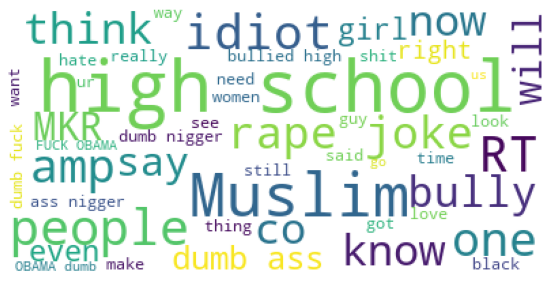

In [37]:
corpus= " ".join(data['tweet_text'])
word_cloud = WordCloud(max_words=100, background_color='white', min_font_size = 10).generate(corpus)
img = word_cloud.to_image()

fig = plt.figure(1)
plt.imshow(img)
plt.axis('off')
plt.show()

Berdasarkan hasil Word Cloud diatas, kita dapat melihat bahwa high School mempunyai nilai paling tinggi, atau bisa kita sebut bahwa kata tersebut sering muncul.

# **TEXT PREPROCESSING**

Pada bagian ini kita akan melakukan text preprocessing, yang dimana berisi seperti Case Folding, Tokeninzing, filtering ,stemming dll

In [38]:
# Display data
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


## Case Folding

pada bagian ini kita akan melakukan case folding, yang dimana tahap mengubah text menjadi lowercase, disini kita akan menggunakan tweet_text[3]

In [39]:
# Convert to lowercase
teks = data.tweet_text[3]
teks_lower = teks.lower()
teks_lower

'@jason_gio meh. :p  thanks for the heads up, but not too concerned about another angry dude on twitter.'

## Remove Punctation

Pada bagian ini kita akan melakukan Remove Punctation seperti menghapus angka, prunctuation dan whitespace.

In [40]:
teks_punc = re.sub("@[A-Za-z0-9_]+"," ", teks_lower)    # Remove Mention
teks = re.sub("#[A-Za-z0-9_]+"," ", teks)               # Remove hashtag
teks_punc = re.sub(r"\\n"," ",teks_punc)                # Remove \n
teks_punc = teks_punc.strip()
teks_punc = re.sub(r"http\S+", " ", teks_punc)          # Remove link
teks_punc = re.sub(r"www.\S+", " ", teks_punc)          # Remove link
teks_punc = re.sub(":p"," ", teks_punc)                 # Remove yang bukan huruf
teks_punc = re.sub("[^A-Za-z\s']"," ", teks_punc)       # Remove yang bukan huruf
teks_punc = re.sub("rt"," ",teks_punc)                  # Remove RT
teks_punc

'meh     thanks for the heads up  but not too concerned about another angry dude on twitter '

Kita telah menghilangkan beberapa karakter yang tidak digunakan untuk pemodelan.

## Stop Words

Pada bagian ini kita akan melakukan stop words,

In [41]:
# Remove Stopwords
stpwds_id = list(set(stopwords.words('english')))
tokens = word_tokenize(teks_punc)
teks_stopwords = [word for word in tokens if word not in stpwds_id]

## Stemming

Kita akab melakukan stemming

In [42]:
# Stemming
ps = PorterStemmer()
text_stemed = [ps.stem(word) for word in teks_stopwords]

## Lemmitizer

Kita akan melakukan Lemmitizer

In [43]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
" ".join([lemmatizer.lemmatize(word) for word in text_stemed])

'meh thank head concern anoth angri dude twitter'

## Function

Pada bagian ini kita akan membuat function yang terdiri dari beberapa proses text preprocessing, tujuan function ini dibuat adalah untuk di aplikasikan kedalam data frame.

In [44]:
def text_proses(teks):
  
  # Text Proccesed Punctation
  teks = teks.lower()
  text_processed = re.sub("@[A-Za-z0-9_]+"," ", teks)               
  text_processed = re.sub("#[A-Za-z0-9_]+"," ", text_processed)     
  text_processed = re.sub(r"\\n"," ",text_processed)                
  text_processed = text_processed.strip()
  text_processed = re.sub(r"http\S+", " ", text_processed)          
  text_processed = re.sub(r"www.\S+", " ", text_processed)          
  text_processed = re.sub(":p"," ", text_processed)                 
  text_processed = re.sub("[^A-Za-z\s']"," ", text_processed)       
  text_processed = re.sub("rt"," ",text_processed)
  # text_processed = re.sub(" ", text_processed)         

  # Remove Stopwords
  stopword_ = list(set(stopwords.words('english')))
  tokens = word_tokenize(text_processed)
  text_stopword = [word for word in tokens if word not in stopword_]

  # Text Stemming
  text_stemed = [ps.stem(word) for word in text_stopword]
  teks = ps.stem(text_processed)

  # Text Lemmatization
  return " ".join([lemmatizer.lemmatize(word) for word in text_stemed])

Setelah membuat function, kita akan melakukan pecobaan terhadap data kita, kita akan melihat apakah function yang kita buat berhasil ?

## Text Processed

In [45]:
# Memilih dokumen/tweet 
data['tweet_text'][4]

'@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account.  Like Islam, it is all lies.'

In [46]:
# Melakukan Text process berdasarkan tweet yang dipilih
text_proses(data['tweet_text'][4])

'isi account pretend kurdish account like islam lie'

Setelah kita melakukan percobaan ternyata terbukti bahwa function yang kita buat berhasil, selanjutnya kita akan melakukan text process terhadap data menggunakan function yang kita buat.

In [47]:
# Text Process Data
data['text_processed'] = data['tweet_text'].apply(lambda x: text_proses(x))
data

,tweet_text,cyberbullying_type,text_processed
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word food crapilici
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,white
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classi whore red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thank head concern anoth angri dude twitter
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretend kurdish account like islam...
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,black ppl n't expect anyth depend anyth yet fr...
47688,Turner did not withhold his disappointment. Tu...,ethnicity,turner withhold disappoint turner call cou abo...
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,swear god dumb nigger bitch got bleach hair re...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,yea fuck your nigger fuck unfollow fuck dumb n...


Setelah melakukan Text Process terhadap data frame, selanjutnya kita akan membuat pelabelan. sebelum melakukan pelabelan kita akan melihat dulu target dari dataset.

In [48]:
data['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

Kita akan melakukan pelabelan untuk data yang kita punya berdasarkan dari `cyberbullying_type` 
* not_cyberbullying = 0
* gender = 1
* religion = 2 
* other cyberbullying = 3
* age = 4
* ethnicity = 5

In [49]:
# Melakukan Encoding untuk label
data['label'] = data['cyberbullying_type'].replace({'not_cyberbullying' : 0 ,
                                                    'gender' : 1,
                                                    'religion' : 2,
                                                    'other_cyberbullying' : 3,
                                                    'age' : 4,
                                                    'ethnicity': 5})

Kita telah selesai melakukan labeling terhadap dataset, selanjutnya kita akan menampilkan data

In [50]:
# Display dataset
data

,tweet_text,cyberbullying_type,text_processed,label
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word food crapilici,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,white,0
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classi whore red velvet cupcak,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thank head concern anoth angri dude twitter,0
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretend kurdish account like islam...,0
...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,black ppl n't expect anyth depend anyth yet fr...,5
47688,Turner did not withhold his disappointment. Tu...,ethnicity,turner withhold disappoint turner call cou abo...,5
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,swear god dumb nigger bitch got bleach hair re...,5
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,yea fuck your nigger fuck unfollow fuck dumb n...,5


# **DATA PREPROCESSING**

Pada bagian ini kita akan melakukan pembersihan data terhadap dataset yang akan kita jadikan pemodelan.

Sebelum melakukan proses data lebih lanjut, disini saya akan membuat random state untuk model.

In [51]:
# Set Random State
np.random.seed(10)
tf.random.set_seed(10)

## Cleaning white space 

Seperti yang kita tahu sebelumnya kita telah memprediksi bahwa akan ada baris yang terisi white space setelah kita lakukan remove punctuation. Pada bagian ini kita akan menghapus baris tersebut, karena menurut saya baris tersebut dapat merusak model dalam proses training yang dimana model mengeluarkan label sedangkan featurenya hanya white space.

In [52]:
# Display data white space

data[data['text_processed'] == '' ]

,tweet_text,cyberbullying_type,text_processed,label
10,@Jord_Is_Dead http://t.co/UsQInYW5Gn,not_cyberbullying,,0
173,#simpleasthat,not_cyberbullying,,0
189,#face #hope #bullying http://t.co/taLCQMj,not_cyberbullying,,0
280,@ANDAASONSAN https://t.co/dtjOHnRNhQ,not_cyberbullying,,0
307,:D,not_cyberbullying,,0
...,...,...,...,...
40118,#beachbodyready http://t.co/nTAnxTG50h,ethnicity,,5
41609,#ISIS #Qaeda #Nusra #Takfiri #Terror,ethnicity,,5
41909,#Coon,ethnicity,,5
42234,#ScaredOfTheMedia,ethnicity,,5


Kita bisa melihat bahwa ada total 533 tweet yang menjadi white space setelah dilakukan remove punctuation, tweet atau text ini akan kita lakukan drop untuk meminimalisir kesalahan belajar model pada saat training. Kita akan mengubah kolom white space menjadi NaN atau missing value terlebih dahulu, setelah itu kita akan mendrop kolom tersebut.

In [53]:
data.replace('', np.nan, inplace=True)

Kita akan cek apakah cara tersebut berjalan dengan baik

In [54]:
# Display Missing Value
data.isnull().sum()

tweet_text              0
cyberbullying_type      0
text_processed        533
label                   0
dtype: int64

Seperti yang dapat kita lihat bahwa baris whitespace tersebut telah kita ubah menjadi missing value, dan kita akan melakukan handling missing value pada tahap handling missing value.

## Data for model

Kita akan membuat data untuk model inference

In [55]:
# Membuat data Inference

data_inference = data.sample(3, random_state=10)

setelah membuat data untuk model inference, sekarang kita akan melakukan pembuatan data untuk Train test. Data train test ini tidak boleh berisi dari data inference.

In [56]:
# Membuat data train test

data_train_test = data.drop(data_inference.index)
data_train_test.head()

,tweet_text,cyberbullying_type,text_processed,label
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word food crapilici,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,white,0
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classi whore red velvet cupcak,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thank head concern anoth angri dude twitter,0
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretend kurdish account like islam...,0


Setelah membuat data inference dan data Train Test, selanjutnya kita akan melakukan reset index.

In [57]:
# Reset Index

data_inference.reset_index(drop=True, inplace=True)
data_train_test.reset_index(drop=True, inplace=True)

In [58]:
# Display data inference
data_inference

,tweet_text,cyberbullying_type,text_processed,label
0,So you want this world but you're calling half...,religion,want world 're call half muslim 'idiot ' encou...,2
1,Truth? Truth is not subjective. Nor is science...,age,truth truth subject scienc unlik vulgar abus l...,4
2,I can't stand you niggers that expect black pp...,ethnicity,ca n't stand nigger expect black ppl fail ever...,5


Kita telah selesai melakukan reset index dari kedua data tersebut.

## Splitting Data

Pada baian ini kita akan melakukan splitting dataset, yangh dimana X akan menjadi Feature dan y menjadi target. Feature kita adalah kolom text yang sudah kita lakukan processed, dan target kita adalah label yang sudah kita buat sebelumnya.

In [59]:
# Split between X and y

X = data_train_test['text_processed']
y = data_train_test['label']

In [60]:
# Display X
X.head()

0                                  word food crapilici
1                                                white
2                       classi whore red velvet cupcak
3      meh thank head concern anoth angri dude twitter
4    isi account pretend kurdish account like islam...
Name: text_processed, dtype: object

In [61]:
# Display y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

Kita telah melakukan split antara Feature dan Target, selanjutnya kita akan melakukan splitting antara Train Test dan Validation set.

In [62]:
# Train Test Val Split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=10, stratify=y_train)

# Cek Dimensional
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('\nX_test', X_test.shape)
print('y_test', y_test.shape)
print('\nX_val', X_val.shape)
print('y_val', y_val.shape)

X_train (30497,)
y_train (30497,)

X_test (9531,)
y_test (9531,)

X_val (7625,)
y_val (7625,)


Kita telah selesai melakukan Splitting antara Train Test dan Validation data

## Handling Missing value

Kita akan melakukan handing missing valueHilangnya sebuah data yang ada ditataset atau biasa disebut sebagai Missing Value ini sangat memengaruhi model yang akan kita buat.

In [63]:
X_train.isnull().sum()

338

In [64]:
X_test.isnull().sum()

102

In [65]:
X_val.isnull().sum()

93

In [66]:
y_train.isnull().sum()

0

In [67]:
y_test.isnull().sum()

0

In [68]:
y_val.isnull().sum()

0

Berdasarkan hasil diatas kita bisa melhat bahwa terdapat Missing value terhadap X_train, X_test dan X_val ini dikarenakan pengubahan whitespace sebelumnya. Pada bagian ini kita akan membuat Data Frame untuk melihat keseluruhan missing value.

In [69]:
# Membuat variable untuk missing value
 
X_train_missval = X_train[X_train.isnull()]
X_test_missval = X_test[X_test.isnull()]
X_val_missval = X_val[X_val.isnull()]

# Display X_train Missing Value
X_train_missval

31641    NaN
27841    NaN
9971     NaN
5545     NaN
30377    NaN
        ... 
24191    NaN
2126     NaN
4248     NaN
25823    NaN
12090    NaN
Name: text_processed, Length: 338, dtype: object

Kita akan melakukan drop data yang tersisi missing value.

In [70]:
# Drop Missing value 

X_train.dropna(axis=0, how='any', inplace=True)
X_test.dropna(axis=0, how='any', inplace=True)
X_val.dropna(axis=0, how='any', inplace=True)

print('Total baris X_train :',X_train.shape[0])
print('Total baris X_test  :',X_test.shape[0])
print('Total baris X_val   :',X_val.shape[0])

Total baris X_train : 30159
Total baris X_test  : 9429
Total baris X_val   : 7532


Kita telah melakukan handling missing value dalam dataset kita, tetapi hal ini membuat shape atau baris antara feature dan target menjadi berbeda dikarenakan kita hanya melakukan drop terhadap feature saja, sedangkan target mempunyai index yang sama dengan feature. Kita akan melakukan drop target berdasarkan index dari feature, sebelum itu kita akan melihat dimensional antara feature dan target.

In [71]:
# Cek Dimensional
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('\nX_test', X_test.shape)
print('y_test', y_test.shape)
print('\nX_val', X_val.shape)
print('y_val', y_val.shape)

X_train (30159,)
y_train (30497,)

X_test (9429,)
y_test (9531,)

X_val (7532,)
y_val (7625,)


Seperti yang bisa kita lihat, bahwa Jumlah baris feature dan target tidak sama, maka dari itu kita akan melakukan handling masalah tersebut.

In [72]:
# Drop baris feature 
y_train.drop(X_train_missval.index, inplace=True)
y_test.drop(X_test_missval.index, inplace=True)
y_val.drop(X_val_missval.index, inplace=True)

Kita akan cek dimensional lagi

In [73]:
# Cek Dimensional
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('\nX_test', X_test.shape)
print('y_test', y_test.shape)
print('\nX_val', X_val.shape)
print('y_val', y_val.shape)

X_train (30159,)
y_train (30159,)

X_test (9429,)
y_test (9429,)

X_val (7532,)
y_val (7532,)


Berdasarkan hasil pada bagian ini:
* Kita telah berhasil melakukan handling missing value
* Kita telah berhasil membuat variable baru yang berisi missing value dari masing-masing set, hal ini bertujuan untuk dijadikan index saat droping target
* Kita berhasil membuat sama dimensional antara feature dan target setelah dilakukan handling missing value

## Tokenization & Word Embedding

Pada bagian ini kita akan melakukan Tokenization atau melakukan proses pengubahan text/kalimat menjadi bagian-bagian kecil atau kata per kata. Kita juga akan melakukan Word Embedding yang dimana word embedding ini proses konversi kata atau karakter kedalam bentuk vector.

Kita akan melakukan Vectorizing terhadap feature

In [74]:
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)
X_val_vec = Vectorize.transform(X_val)

Setelah melakukan Vectorizer kita akan menggunakan TFIDF 

In [76]:
Transformer = TfidfTransformer()

X_train_tfidf = Transformer.fit_transform(X_train_vec)
X_test_tfidf = Transformer.transform(X_test_vec)
X_val_tfidf = Transformer.transform(X_val_vec)

Kita akan melihat berapa jumlah Vocab dan Panjang maksimum kalimat.

In [78]:
jml_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Jumlah vocab:",jml_vocab)
print("Panjang maksimum kalimat:",max_sen_len,"kata")

Jumlah vocab: 21697
Panjang maksimum kalimat: 400 kata


Kita dapat melihat bahwa jumlah vocab sebnayak 21697 dan panjang kalimat ada 400 kata, Saya akan memanfaatkan hasil ini untuk dalam text vectorization.

In [79]:
text_vectorization = TextVectorization(max_tokens=jml_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape =(1,) 
                                       )

text_vectorization.adapt(X_train) 

Kita akan melihat contoh dari kata text_processed

In [80]:
data.text_processed[0]

'word food crapilici'

Kita akan melihat jika kita buat kedalam text_vectorization

In [81]:
text_vectorization([data.text_processed[0]])

<tf.Tensor: shape=(1, 400), dtype=int64, numpy=
array([[ 87, 623,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
   

Berdasarkan hasil diatas:
* Kita dapat melihat bahwa kata 'word' pada kalimat 'word food crapilici' berada di urutan 87 
* Kita dapat melihat bahwa kata 'food' pada kalimat 'word food crapilici' berada di urutan 623
* Kita dapat melihat bahwa kata 'crapilici' pada kalimat 'word food crapilici'berada di urutan 1 atau terdeteksi unknown.

In [83]:
# Melihat vocab 1
text_vectorization.get_vocabulary()[1]

'[UNK]'

Selanjutnya kita akan melakukan embedding.

In [84]:
embedding = Embedding(input_dim=jml_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

Disni saya akan melakukan test sederhana dari model Naive bayes, model ini hanya untuk melakukan test saja tidak termasuk dengan model yang akan kita buat.

In [87]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

y_pred = nb.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.33      0.44      1559
           1       0.81      0.80      0.80      1575
           2       0.77      0.97      0.86      1599
           3       0.63      0.41      0.50      1506
           4       0.68      0.98      0.80      1598
           5       0.81      0.93      0.87      1592

    accuracy                           0.74      9429
   macro avg       0.73      0.74      0.71      9429
weighted avg       0.73      0.74      0.71      9429



Hasil diatas menunjukan ketidakstabilan dalam recall, selanjutnya saya akan mengubah target menggunakan To Categorical karena terget kita termasuk kedalam multiclass.

In [89]:
# To categorical
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)
y_val_ohe = to_categorical(y_val)

Kita telah selesai melakukan perubahan, selanjutnya kita akan membuat pipeline untuk data modeling.

## Pipeline Tensorflow

Pada bagian ini kita akan membuat pipeline tensorflow untuk dataset modeling, saya akan menggunakan shuffle sebanyak 300000 untuk X_train.

In [90]:
# PIpeline dataset Tensorflow

X_train_pipe = tf.data.Dataset.from_tensor_slices((X_train, y_train_ohe)).shuffle(30000).batch(32)
X_test_pipe = tf.data.Dataset.from_tensor_slices((X_test, y_test_ohe)).batch(32)
X_val_pipe = tf.data.Dataset.from_tensor_slices((X_val, y_val_ohe)).batch(32)

# **MODELING**

Pada bagian ini kita akan melakukan modeling menggunakan DNN, LSTM dan GRU. Model yang saya buat kali ini adalah model Natural Languange Processing, dimana model ini akan melakukan text kalsifikasi terhadap input Tweet, objective dari pembuatan model kali ini adalah mendapat model dengan nilai model terbaik.

## Prepare Callbacks

Kita akan membuat callbacks untuk model saat melakukan training, disini saya menggunakna callbacks Early Stopping, yang dimana saya akan memonitor atau koreksi dari val loss, saya juga menggunakan patience = 3 dimana callback akan melihat selama 3 kali iterasi jika val loss mengalami keturunan maka training akan dihentikan sebelum memnuhi epoch. 

In [91]:
my_callbacks= [
            EarlyStopping(monitor= 'val_loss', mode='min', patience= 3, verbose=1)
]

selanjutnya kita akan membuat melakukan modeling.

## Model DNN

In [92]:
# Arsitektur Model
model_dnn = Sequential()
model_dnn.add(text_vectorization)                 
model_dnn.add(embedding)                      
model_dnn.add(GlobalAveragePooling1D())             
model_dnn.add(Dense(32,activation='relu'))        
model_dnn.add(Dense(6,activation='softmax'))

# Compiling model_dnn
model_dnn.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['Recall'])

In [93]:
# Summary Model
model_dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 400)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 400, 128)          2777216   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 6)                 198       
                                                                 
Total params: 2,781,542
Trainable params: 2,781,542
Non-

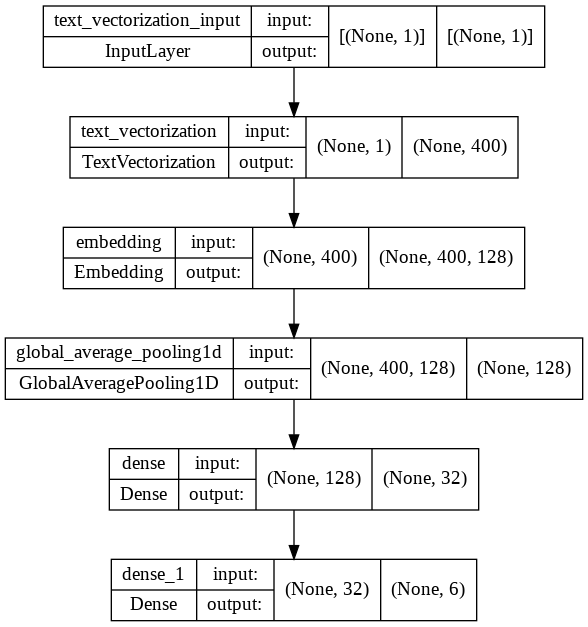

In [94]:
tf.keras.utils.plot_model(model_dnn, show_shapes=True)

In [95]:
# Training Model
model_dnn_hist = model_dnn.fit(X_train_pipe,
                         epochs=10, 
                         callbacks = my_callbacks,
                         validation_data=(X_val_pipe))

Epoch 1/10
943/943 [==============================] - 10s 7ms/step - loss: 1.4646 - recall: 0.0961 - val_loss: 0.8915 - val_recall: 0.4255
Epoch 2/10
943/943 [==============================] - 6s 6ms/step - loss: 0.6425 - recall: 0.5468 - val_loss: 0.5547 - val_recall: 0.5741
Epoch 3/10
943/943 [==============================] - 6s 6ms/step - loss: 0.5075 - recall: 0.6034 - val_loss: 0.5152 - val_recall: 0.5963
Epoch 4/10
943/943 [==============================] - 6s 6ms/step - loss: 0.4685 - recall: 0.6322 - val_loss: 0.4957 - val_recall: 0.6123
Epoch 5/10
943/943 [==============================] - 6s 6ms/step - loss: 0.4455 - recall: 0.6493 - val_loss: 0.4958 - val_recall: 0.6345
Epoch 6/10
943/943 [==============================] - 6s 6ms/step - loss: 0.4295 - recall: 0.6723 - val_loss: 0.4837 - val_recall: 0.6415
Epoch 7/10
943/943 [==============================] - 6s 6ms/step - loss: 0.4130 - recall: 0.6897 - val_loss: 0.4816 - val_recall: 0.6669
Epoch 8/10
943/943 [=============

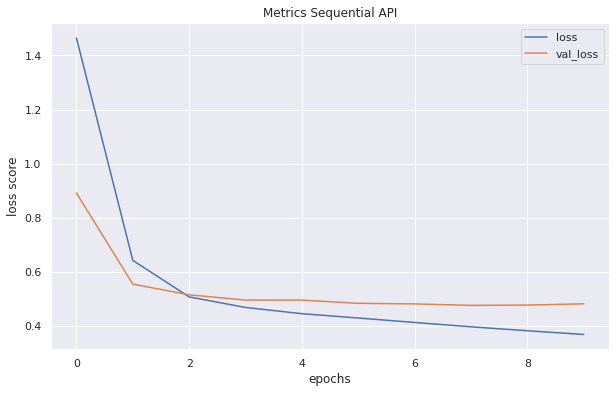

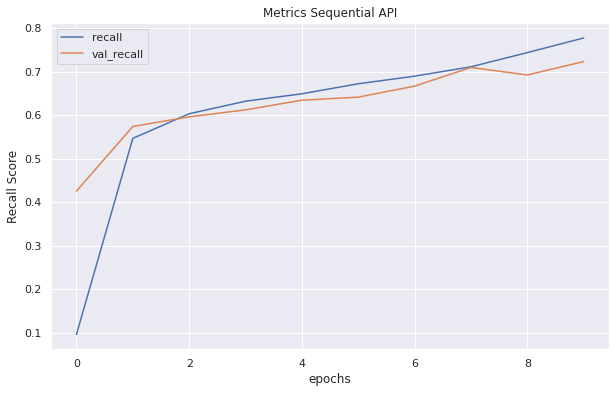

In [96]:
# Evaluation Sequential API Method vs Functional API Method
plot_seq = pd.DataFrame(model_dnn_hist.history)

# Visualization Sequential
plot_seq[['loss','val_loss']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('loss score')
plt.xlabel('epochs')
plt.show()

# Visualization Sequential
plot_seq[['recall','val_recall']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('Recall Score')
plt.xlabel('epochs')
plt.show()

Hasil Model DNN : 
* Berdasarkan grafik diatas kita bisa melihat bahwa nilai loss berada di sekitar 0.3 sedangakan nilai val loss di angkan 0.4
* Berdasarkan grafik diatas kita bisa melihat bahwa nilai Recall mempunyai jarak yang cukup dekat
* Base Model DNN ini terbilang overfit.

## LSTM

In [97]:
# Arsitektur Model LSTM
model_lstm= Sequential()
model_lstm.add(text_vectorization)
model_lstm.add(embedding)
model_lstm.add(LSTM(32))
model_lstm.add(Dense(6,activation='softmax'))

# Compiling Model
model_lstm.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['Recall'])

In [98]:
# Model Summary

model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 400)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 400, 128)          2777216   
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 2,798,022
Trainable params: 2,798,022
Non-trainable params: 0
_________________________________________________________________


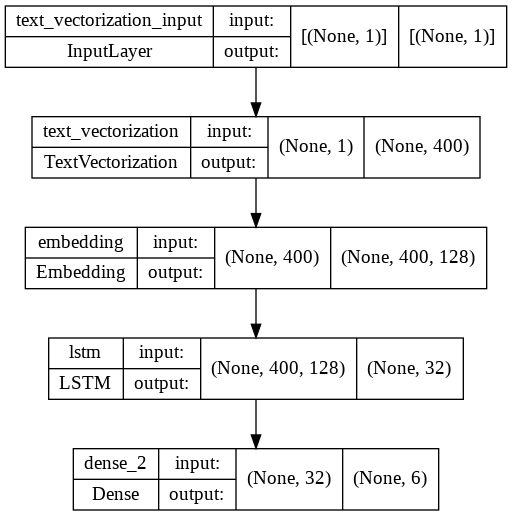

In [99]:
tf.keras.utils.plot_model(model_lstm, show_shapes=True)

In [100]:
# Train Model 
model_lstm_hist = model_lstm .fit(X_train_pipe,
                         epochs=10,
                         callbacks = my_callbacks,
                         validation_data=(X_val_pipe))

Epoch 1/10
943/943 [==============================] - 23s 20ms/step - loss: 1.7927 - recall: 0.0000e+00 - val_loss: 1.7917 - val_recall: 0.0000e+00
Epoch 2/10
943/943 [==============================] - 19s 20ms/step - loss: 1.7923 - recall: 0.0000e+00 - val_loss: 1.7917 - val_recall: 0.0000e+00
Epoch 3/10
943/943 [==============================] - 20s 21ms/step - loss: 1.7919 - recall: 0.0000e+00 - val_loss: 1.7919 - val_recall: 0.0000e+00
Epoch 4/10
943/943 [==============================] - 19s 20ms/step - loss: 1.7919 - recall: 3.3158e-05 - val_loss: 1.7919 - val_recall: 0.0000e+00
Epoch 4: early stopping


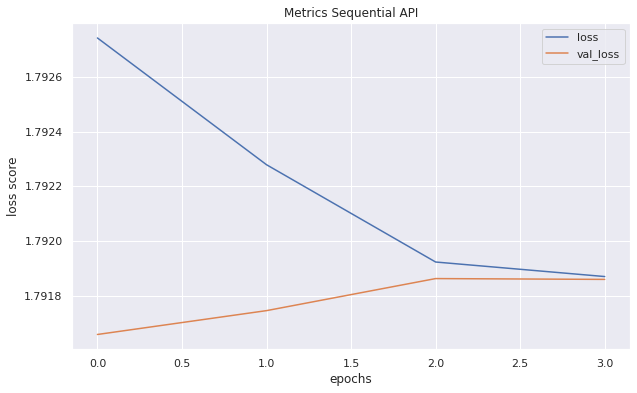

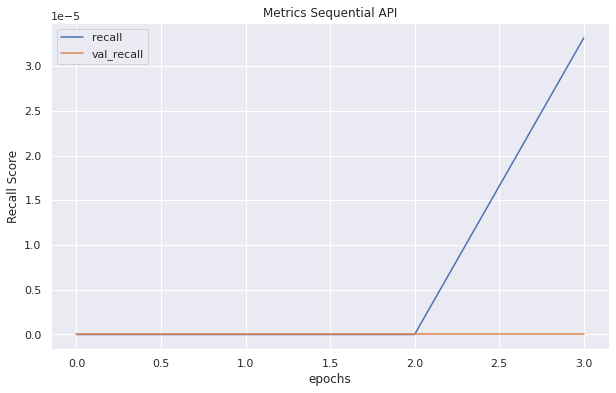

In [101]:
# Evaluation Sequential API Method
plot_seq = pd.DataFrame(model_lstm_hist.history)

# Visualization Sequential
plot_seq[['loss','val_loss']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('loss score')
plt.xlabel('epochs')
plt.show()

# Visualization Sequential
plot_seq[['recall','val_recall']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('Recall Score')
plt.xlabel('epochs')
plt.show()

Hasil Model LSTM :
* Berdasarkan grafik diatas kita bisa melihat bahwa loss dan val loss tidak cenderung overfit atau underfit, tetapi nilai keduanya berada di angka 1.7 yang mana ini terbilang sangat besar.
* Berdasarkan hasil grafik LSTM diatas, nilai Recall bisa mencapai di angka sekitar 0.4 dan val accuracy hanya 0 yang mana hasil tersebut termasuk Gradient Vanishing.
* Dalam Base model LSTM ini terbilang tidak baik karena mempunyai los yang terbilang tinggi dan Recall yang kecil, serta terdapat Vanishing pada nilai Recall.

## Model GRU

In [102]:
# Arsitektur Data
model_gru = Sequential()
model_gru.add(text_vectorization)
model_gru.add(embedding)
model_gru.add(GRU(32))
model_gru.add(Dense(6,activation='softmax'))

# Compiling Model
model_gru.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['Recall'])

In [103]:
# Model Summary
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 400)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 400, 128)          2777216   
                                                                 
 gru (GRU)                   (None, 32)                15552     
                                                                 
 dense_3 (Dense)             (None, 6)                 198       
                                                                 
Total params: 2,792,966
Trainable params: 2,792,966
Non-trainable params: 0
_________________________________________________________________


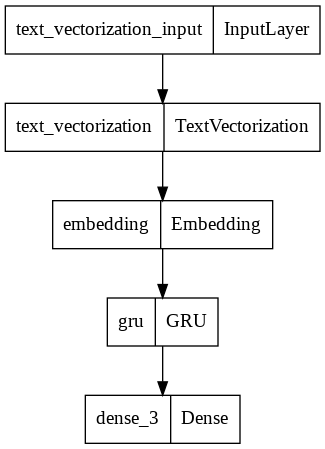

In [104]:
# Plot Model
tf.keras.utils.plot_model(model_gru)

In [105]:
# Training Model
model_gru_hist = model_gru.fit(X_train_pipe,
                         epochs=10,
                         callbacks = my_callbacks,
                         validation_data=(X_val_pipe))

Epoch 1/10
943/943 [==============================] - 19s 18ms/step - loss: 1.7930 - recall: 0.0000e+00 - val_loss: 1.7924 - val_recall: 0.0000e+00
Epoch 2/10
943/943 [==============================] - 17s 18ms/step - loss: 1.7922 - recall: 0.0000e+00 - val_loss: 1.7917 - val_recall: 0.0000e+00
Epoch 3/10
943/943 [==============================] - 17s 18ms/step - loss: 1.7920 - recall: 3.3158e-05 - val_loss: 1.7919 - val_recall: 0.0000e+00
Epoch 4/10
943/943 [==============================] - 17s 18ms/step - loss: 1.7919 - recall: 3.3158e-05 - val_loss: 1.7918 - val_recall: 0.0000e+00
Epoch 5/10
943/943 [==============================] - 17s 18ms/step - loss: 1.7919 - recall: 3.3158e-05 - val_loss: 1.7916 - val_recall: 0.0000e+00
Epoch 6/10
943/943 [==============================] - 17s 18ms/step - loss: 1.7918 - recall: 3.3158e-05 - val_loss: 1.7918 - val_recall: 0.0000e+00
Epoch 7/10
943/943 [==============================] - 17s 18ms/step - loss: 1.7917 - recall: 3.3158e-05 - val_lo

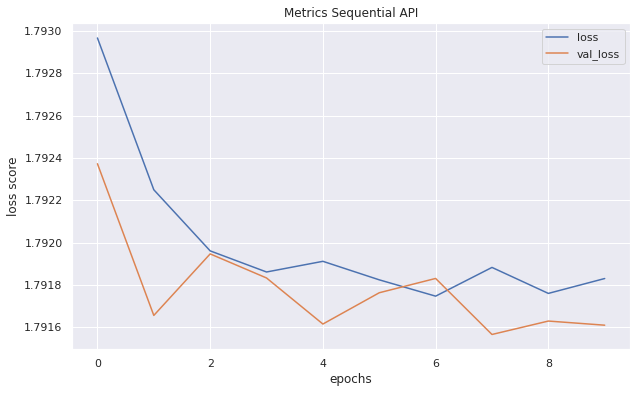

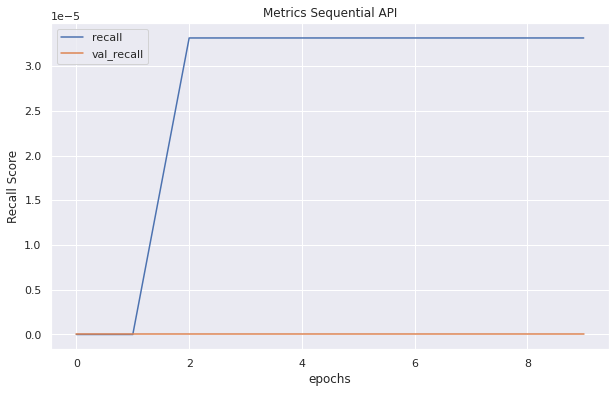

In [106]:
# Evaluation Sequential API 
plot_seq = pd.DataFrame(model_gru_hist.history)

# Visualization Loss
plot_seq[['loss','val_loss']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('loss score')
plt.xlabel('epochs')
plt.show()

# Visualization Accuracy
plot_seq[['recall','val_recall']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('Recall Score')
plt.xlabel('epochs')
plt.show()

Hasil Model GRU : 
* Berdasarkan Hasil diatas kita bisa melihat bahwa Loss dan Val Loss yang dari model GRU mempunyai angka yang cukup tinggi berada di sekitar 1.7, melihat dari grafik tersebut terlihat bahwa jarak antara Loss dan Val Loss pada epoch 3, mempunyai range yang tidak terlalu lebar.
* Berdasrekan Hasil grafik diatas kita bisa melihat bahwa Recall pada Base model Gru terbilang buruk, karena hanya bisa mencapai di angka 4 untuk Recall dan 0 untuk Val Recall.
* Base Model GRU terbilang tidak bagus karena mendapatkan nilai Loss yang cukup tinggi dan nilai Rcall yang rendah, serta terdapat Vanishing gradient pada Recall Score.

# **MODEL IMPROVEMENT & MODEL EVALUATION**

Pada bagian ini kita akan melakukan improvement terhadap model yang sebelumnya sudah kita buat, dengan objective setelah kita lakukan improvement model tersebut akan menjadi lebih bagus, baik dari Loss ataupun Recall.

## Model DNN

In [107]:
# Arsitektur Model
model_dnn_imp = Sequential()
model_dnn_imp.add(text_vectorization)                 
model_dnn_imp.add(embedding)                      
model_dnn_imp.add(GlobalAveragePooling1D())
model_dnn_imp.add(Dense(128, activation='elu', kernel_initializer=tf.keras.initializers.glorot_normal))
model_dnn_imp.add(Dropout(0.6))             
model_dnn_imp.add(Dense(32, activation='elu', kernel_initializer=tf.keras.initializers.glorot_normal))
model_dnn_imp.add(Dropout(0.6))
model_dnn_imp.add(BatchNormalization())
model_dnn_imp.add(Dense(32, activation='elu', kernel_initializer=tf.keras.initializers.glorot_normal))
model_dnn_imp.add(Dropout(0.6))
model_dnn_imp.add(BatchNormalization())

model_dnn_imp.add(Dense(6,activation='softmax'))

# Compiling model_dnn_imp
model_dnn_imp.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(clipnorm=1, clipvalue=1), metrics=['Recall'])

In [108]:
# Summary Model
model_dnn_imp.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 400)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 400, 128)          2777216   
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 32)               

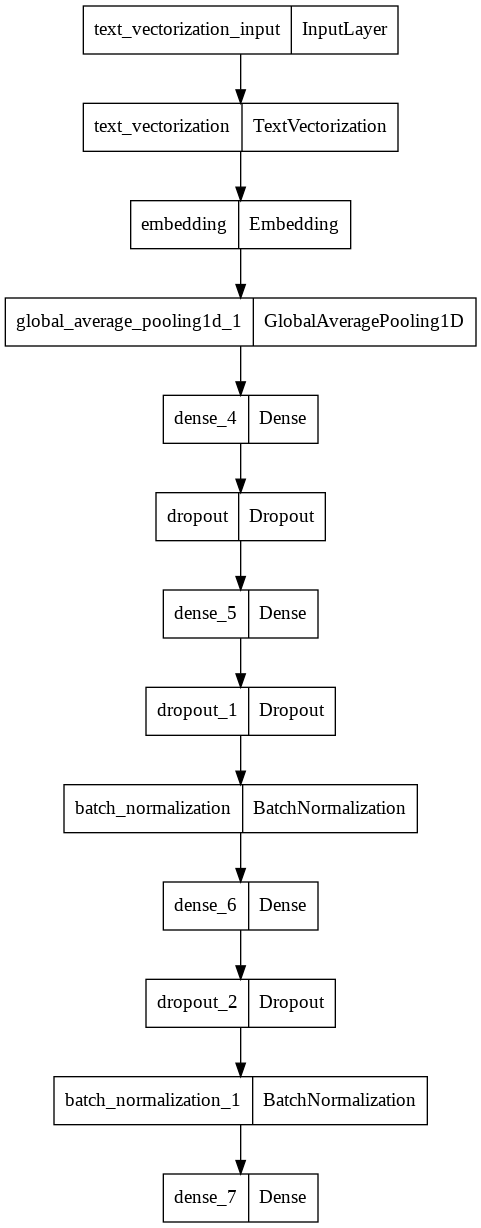

In [109]:
tf.keras.utils.plot_model(model_dnn_imp)

In [110]:
# Training Model
model_dnn_imp_hist = model_dnn_imp.fit(X_train_pipe,
                         epochs=15, 
                         callbacks = my_callbacks,
                         validation_data=(X_val_pipe))

Epoch 1/15
943/943 [==============================] - 11s 9ms/step - loss: 0.8210 - recall: 0.5235 - val_loss: 0.4717 - val_recall: 0.6448
Epoch 2/15
943/943 [==============================] - 8s 9ms/step - loss: 0.5764 - recall: 0.6548 - val_loss: 0.4813 - val_recall: 0.7446
Epoch 3/15
943/943 [==============================] - 8s 9ms/step - loss: 0.5346 - recall: 0.6924 - val_loss: 0.5159 - val_recall: 0.7535
Epoch 4/15
943/943 [==============================] - 9s 10ms/step - loss: 0.5116 - recall: 0.7151 - val_loss: 0.4695 - val_recall: 0.7406
Epoch 5/15
943/943 [==============================] - 8s 9ms/step - loss: 0.4946 - recall: 0.7327 - val_loss: 0.4960 - val_recall: 0.7461
Epoch 6/15
943/943 [==============================] - 8s 9ms/step - loss: 0.4860 - recall: 0.7453 - val_loss: 0.4612 - val_recall: 0.7347
Epoch 7/15
943/943 [==============================] - 9s 9ms/step - loss: 0.4720 - recall: 0.7543 - val_loss: 0.5380 - val_recall: 0.7639
Epoch 8/15
943/943 [============

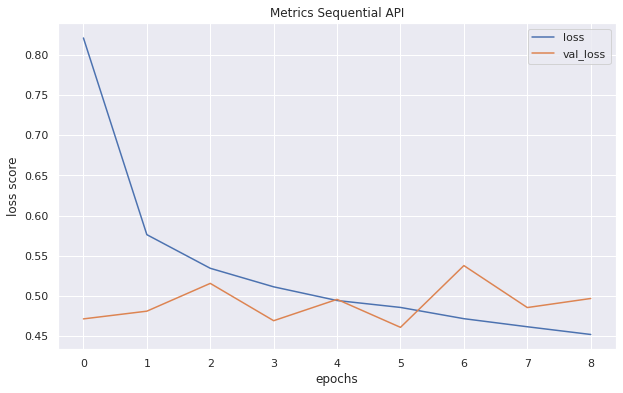

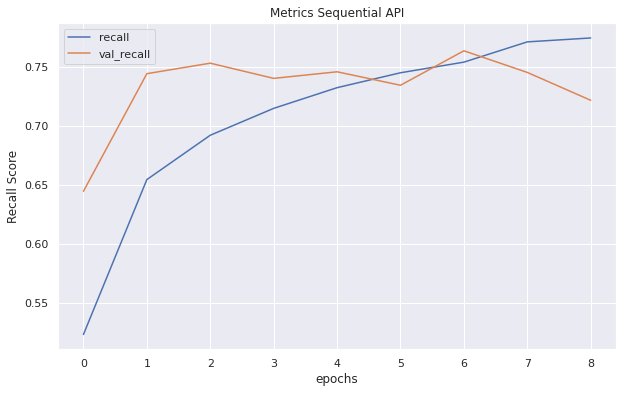

In [111]:
# Evaluation Sequential API Method vs Functional API Method
plot_seq = pd.DataFrame(model_dnn_imp_hist.history)

# Visualization Sequential
plot_seq[['loss','val_loss']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('loss score')
plt.xlabel('epochs')
plt.show()

# Visualization Sequential
plot_seq[['recall','val_recall']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('Recall Score')
plt.xlabel('epochs')
plt.show()

Hasil Dari improvement model DNN
* Berdsarkan hasil grafik diatas kita bisa melihat bahwa nilai loss dan Val Loss mempunyai score yang sama yaitu 0.47
* Berdasarkan hasil diatas kita bisa melihat bahwa recall 0.7477 sedangkan val_recall 0.7394, hanya berbeda sedikit yang artinya model ini cukup baik.
* Hasil dari improvement model DNN mendapatkan nilai yang cukup baik dan sudah terbilang goodfit, karena nilai score yang dimiliki model ini cenderung baik.

## Model LSTM

In [112]:
# Arsitektur Model LSTM
model_lstm_imp= Sequential()
model_lstm_imp.add(text_vectorization)
model_lstm_imp.add(embedding)
model_lstm_imp.add(LSTM(64, return_sequences=True, kernel_initializer=tf.keras.initializers.glorot_normal, 
                        kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model_lstm_imp.add(LSTM(64,  return_sequences=True, kernel_initializer=tf.keras.initializers.glorot_normal,
                        kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model_lstm_imp.add(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.glorot_normal,
                        kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model_lstm_imp.add(LSTM(16, kernel_initializer=tf.keras.initializers.glorot_normal,
                        kernel_regularizer=tf.keras.regularizers.l2(0.1))) 
model_lstm_imp.add(Dense(6,activation='softmax'))

# Compiling Model
model_lstm_imp.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=0.01, clipnorm=0.1), metrics=['Recall'])

In [113]:
# Model Summary
model_lstm_imp.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 400)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 400, 128)          2777216   
                                                                 
 lstm_1 (LSTM)               (None, 400, 64)           49408     
                                                                 
 lstm_2 (LSTM)               (None, 400, 64)           33024     
                                                                 
 lstm_3 (LSTM)               (None, 400, 32)           12416     
                                                                 
 lstm_4 (LSTM)               (None, 16)                3136      
                                                      

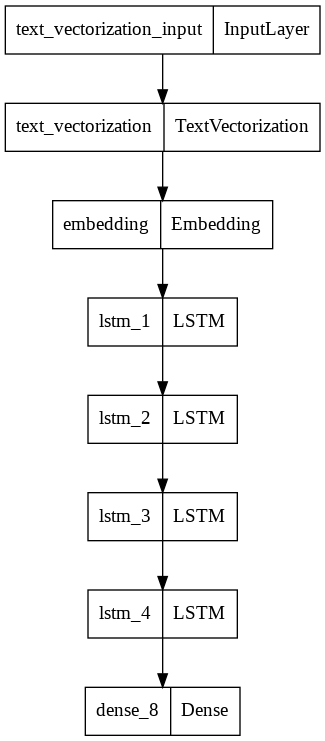

In [114]:
tf.keras.utils.plot_model(model_lstm_imp)

In [115]:
# Training Model
model_lstm_imp_hist = model_lstm_imp.fit(X_train_pipe,
                         epochs=10, 
                         callbacks = my_callbacks,
                         validation_data=(X_val_pipe))

Epoch 1/10
943/943 [==============================] - 64s 62ms/step - loss: 2.0092 - recall: 0.0000e+00 - val_loss: 1.7924 - val_recall: 0.0000e+00
Epoch 2/10
943/943 [==============================] - 58s 61ms/step - loss: 1.7931 - recall: 0.0000e+00 - val_loss: 1.7922 - val_recall: 0.0000e+00
Epoch 3/10
943/943 [==============================] - 62s 66ms/step - loss: 1.7929 - recall: 0.0000e+00 - val_loss: 1.7930 - val_recall: 0.0000e+00
Epoch 4/10
943/943 [==============================] - 61s 64ms/step - loss: 1.7932 - recall: 0.0000e+00 - val_loss: 1.7930 - val_recall: 0.0000e+00
Epoch 5/10
943/943 [==============================] - 58s 61ms/step - loss: 1.7932 - recall: 0.0000e+00 - val_loss: 1.7921 - val_recall: 0.0000e+00
Epoch 6/10
943/943 [==============================] - 59s 62ms/step - loss: 1.7930 - recall: 0.0000e+00 - val_loss: 1.7937 - val_recall: 0.0000e+00
Epoch 7/10
943/943 [==============================] - 64s 68ms/step - loss: 1.7933 - recall: 0.0000e+00 - val_lo

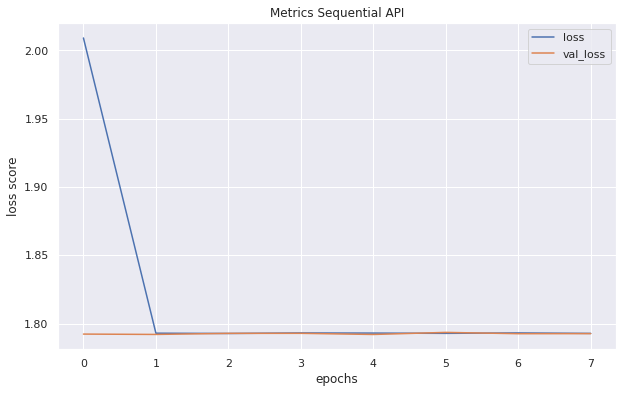

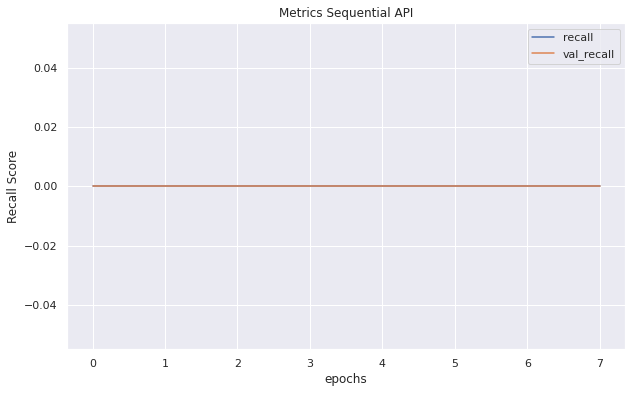

In [116]:
plot_seq = pd.DataFrame(model_lstm_imp_hist.history)

# Visualization Sequential
plot_seq[['loss','val_loss']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('loss score')
plt.xlabel('epochs')
plt.show()

# Visualization Sequential
plot_seq[['recall','val_recall']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('Recall Score')
plt.xlabel('epochs')
plt.show()

Hasil Improvement dari model LSTM : 
* Setelah dilakukan beberapa kali percobaan, model LSTM tidak mendapat perubahan yang signifikan dan tetap mendapat loss dan val loss di sekitar 1.7
* Berdasarkan hasil diatas kita bisa melihat bahwa nilai recall dan val recall menadapatkan hasil yang tidak baik.
* Model LSTM mempunyai sistem algoritma yang complex dengan algoritma yang seperti itu dapat membuat model ini menjadi powerful, tetapi model ini tidak terlalu cocok dengan dataset kali ini.

## Model GRU

In [117]:
# Arsitektur Data
model_gru_imp = Sequential()
model_gru_imp.add(text_vectorization)
model_gru_imp.add(embedding)
model_gru_imp.add(GRU(128, return_sequences= True))
model_gru_imp.add(GRU(64))
# model_gru_imp.add(GRU(8))
# model_gru_imp.add(Dense(16,activation='relu'))
model_gru_imp.add(Dense(6,activation='softmax'))

# Compiling Model
model_gru_imp.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['Recall'])

In [118]:
# Model Summary
model_gru_imp.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 400)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 400, 128)          2777216   
                                                                 
 gru_1 (GRU)                 (None, 400, 128)          99072     
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense_9 (Dense)             (None, 6)                 390       
                                                                 
Total params: 2,913,926
Trainable params: 2,913,926
Non-trainable params: 0
____________________________________________

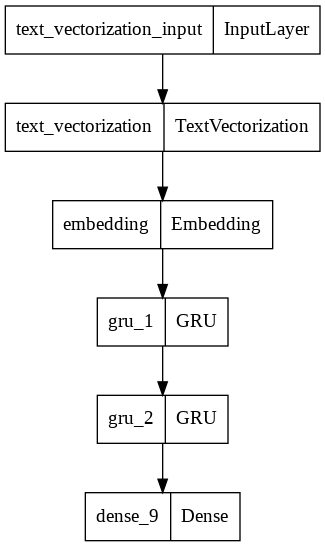

In [119]:
tf.keras.utils.plot_model(model_gru_imp)

In [120]:
# Training Model
model_gru_imp_hist = model_gru_imp.fit(X_train_pipe,
                         epochs=10,
                         callbacks = my_callbacks,
                         validation_data=(X_val_pipe))

Epoch 1/10
943/943 [==============================] - 40s 39ms/step - loss: 1.7928 - recall: 0.0000e+00 - val_loss: 1.7922 - val_recall: 0.0000e+00
Epoch 2/10
943/943 [==============================] - 34s 36ms/step - loss: 1.7922 - recall: 0.0000e+00 - val_loss: 1.7916 - val_recall: 0.0000e+00
Epoch 3/10
943/943 [==============================] - 34s 36ms/step - loss: 1.7921 - recall: 0.0000e+00 - val_loss: 1.7916 - val_recall: 0.0000e+00
Epoch 4/10
943/943 [==============================] - 34s 36ms/step - loss: 1.7920 - recall: 0.0000e+00 - val_loss: 1.7916 - val_recall: 0.0000e+00
Epoch 5/10
943/943 [==============================] - 34s 36ms/step - loss: 1.7920 - recall: 3.3158e-05 - val_loss: 1.7918 - val_recall: 0.0000e+00
Epoch 6/10
943/943 [==============================] - 35s 37ms/step - loss: 1.7919 - recall: 3.3158e-05 - val_loss: 1.7916 - val_recall: 0.0000e+00
Epoch 6: early stopping


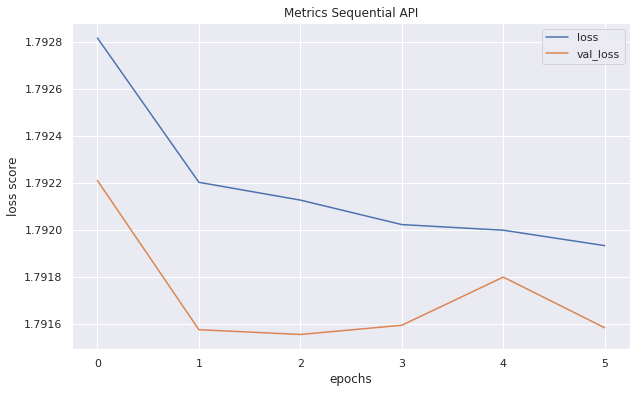

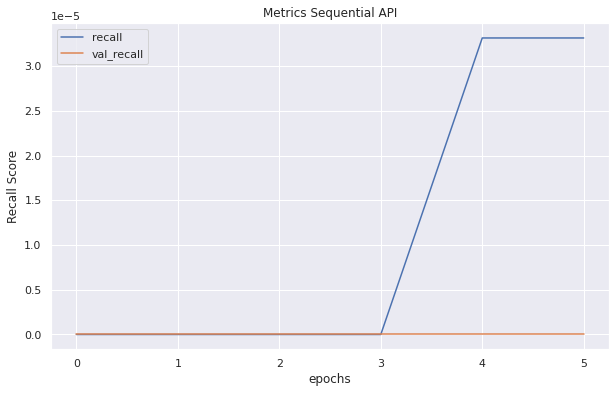

In [121]:
# Evaluation Sequential API 
plot_seq = pd.DataFrame(model_gru_imp_hist.history)

# Visualization Loss
plot_seq[['loss','val_loss']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('loss score')
plt.xlabel('epochs')
plt.show()

# Visualization Accuracy
plot_seq[['recall','val_recall']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('Recall Score')
plt.xlabel('epochs')
plt.show()

Hasil Dari model GRU:
* Berdsarakan hasil diatas kita bisa melihat bahwa nilai loss mendapati 1.7
* Berdasarkan hasil diatas kita bisa melihat bahwa nilai recall untuk model improvement Gru masih terbilang jelek.

## Evaluate Model

**DNN**

In [122]:
score_model_dnn = model_dnn.evaluate(X_test_pipe, verbose=0)
print('Base Model')
print('Test Loss   : ', score_model_dnn[0])
print('Test Recall : ', score_model_dnn[1])

score_model_dnn_imp = model_dnn_imp.evaluate(X_test_pipe, verbose=0)
print('\nAfter Improvement')
print('Test Loss   : ', score_model_dnn_imp[0])
print('Test Recall : ', score_model_dnn_imp[1])

Base Model
Test Loss   :  0.7305527329444885
Test Recall :  0.6136387586593628

After Improvement
Test Loss   :  0.4748670160770416
Test Recall :  0.7776010036468506


Seperti yang bisa kita lihat bahwa nilai improvement model, dari model DNN mendapati kenaikan untuk nilai recall yang mana sebelumnya 0.6 dan setelah melakukan improvement mendapatkan nilai 0.7, Nilai Loss juga mengalami penurunan yang sebelumnya 0.7 menjadi 0.4

---
**LSTM**

In [123]:
score_model_lstm = model_lstm.evaluate(X_test_pipe, verbose=0)
print('Base Model')
print('Test Loss   : ', score_model_lstm[0])
print('Test Recall : ', score_model_lstm[1])

score_model_lstm_imp = model_lstm_imp.evaluate(X_test_pipe, verbose=0)
print('\nAfter Improvement')
print('Test Loss   : ', score_model_lstm_imp[0])
print('Test Recall : ', score_model_lstm_imp[1])

Base Model
Test Loss   :  1.7918094396591187
Test Recall :  0.0

After Improvement
Test Loss   :  1.7928483486175537
Test Recall :  0.0


Kita bisa melihat bahwa nilai dari LSTM tidak menghalami perubahan.

---
**GRU**

In [124]:
score_model_gru = model_gru.evaluate(X_test_pipe, verbose=0)
print('Base Model')
print('Test Loss   : ', score_model_gru[0])
print('Test Recall : ', score_model_gru[1])

score_model_gru_imp = model_gru_imp.evaluate(X_test_pipe, verbose=0)
print('\nAfter Improvement')
print('Test Loss   : ', score_model_gru_imp[0])
print('Test Recall : ', score_model_gru_imp[1])

Base Model
Test Loss   :  1.7916609048843384
Test Recall :  0.0

After Improvement
Test Loss   :  1.7915631532669067
Test Recall :  0.0


Sama seperti model LSTM, model GRU juga tidak mengalamai perubahan saat sebelum dan sesudah Imporvement.

**CONCLUSION MODELING**

Dari hasil diatas kita telah melakukan beberapa kali modeling :
* Model DNN mengalami kenaikan terhadap Recall.
* Model dengan nilai terbaik terdapat pada Model DNN 
* Model LSTM dan GRU mendapatkan nilai yang tidak baik

# **MODEL SAVING**

Kita akan menyimpan model yang terbaik dari hasil percobaan  yang telah kita lakukan

In [125]:
# Save the best model
model_dnn_imp.save('best_dnn', save_traces=True)

INFO:tensorflow:Assets written to: best_dnn/assets


# **MODEL INFERENCE**

## Load Model

In [126]:
# Load saved model
model = tf.keras.models.load_model('best_dnn')

In [127]:
# Display data
data_inference

,tweet_text,cyberbullying_type,text_processed,label
0,So you want this world but you're calling half...,religion,want world 're call half muslim 'idiot ' encou...,2
1,Truth? Truth is not subjective. Nor is science...,age,truth truth subject scienc unlik vulgar abus l...,4
2,I can't stand you niggers that expect black pp...,ethnicity,ca n't stand nigger expect black ppl fail ever...,5


In [128]:
# Print Text
for text in data_inference['text_processed']:
  print(text)

want world 're call half muslim 'idiot ' encourag everyon turn exclud tabl stop think lol
truth truth subject scienc unlik vulgar abus languag bet jesu proud own lib ppl die result misinform truth name call like school yard bulli
ca n't stand nigger expect black ppl fail everyth fuck 're black dumb fuck


## Predict

Kita akan melakukan beberapa percobaan dalam prediksi : 
1. pertama kita akan melakukan predict menggunakan kolom yang sudah di proses
2. kedua kita akan melakukan prediksi menggunakan kolom yang belum dilakukan proses text.

In [129]:
# Predict Inference dengan text yang sudah di proses

for i in data_inference['text_processed'] :
  y_pred = tf.nn.softmax(model.predict([i])).numpy().argmax(axis=1)
  print('Hasil Predict :', y_pred)

Hasil Predict : [2]
Hasil Predict : [4]
Hasil Predict : [5]


In [130]:
# Predict Inference dengan text yang belum di proses
for i in data_inference['tweet_text'] :
  y_pred_1 = tf.nn.softmax(model.predict([i])).numpy().argmax(axis=1)
  print('Hasil Predict :', y_pred_1)

Hasil Predict : [3]
Hasil Predict : [4]
Hasil Predict : [5]


Kita bisa melihat bahwa hasil diatas menunjukan model lebih bagus memprediksi jika text yang di bersihkan terlebih dahulu dibandingkan dengan text yang masih mentah atau belum dibersihkan. Selanjutnya saya akan melakukan test berdasarkan Twitter, ada 2 contoh yang akan saya gunakaan.


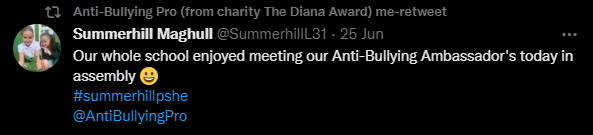

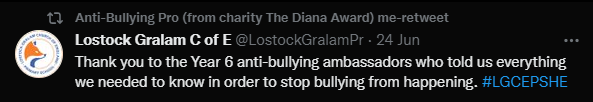

In [131]:
# Membuat Variable untuk text
tweet_inf = "Our whole school enjoyed meeting our Anti-Bullying Ambassador's today in assembly 😀",\
            "Thank you to the Year 6 anti-bullying ambassadors who told us everything we needed to know in order to stop bullying from happening. #LGCEPSHE",\
            "SpaceX urged the FCC to investigate whether Dish and Michael Dell-affiliate RS Access filed intentionally misleading reports in the battle over 12GHz broadband, a fight SpaceX representatives describe as an unlikely but existential threat to Starlink:"# Teks buatan sendiri

# Prediksi Text
for i in tweet_inf :
  tp = text_proses(i) 
  y_pred_tweet = tf.nn.softmax(model.predict([tp])).numpy().argmax(axis=1)
  print(y_pred_tweet)

[4]
[3]
[3]


Kita bisa melihat bahwa model bisa menebak sebuah text, walaupun tidak terlalu baik.

# **ANSWER THE QUESTION**


### 1. Dapatkah Student menjelaskan alasan suatu teknik preprocessing dipilih ?

Saya melakukan Case folding dengan alasan sebagai berikut:
* Melakukan remove punctuation untuk menghapus karakter yang tidak penting seperti @#$%^&*()_+! karena dalam kasus Text Categorization kali ini kita hanya diharuskan untuk membaca kata saja.
* Alasan saya menggunakan stemming untuk menghilangkan imbuhan kata
* Alasan Lemmatizing untuk melakukan atau mengembalikan kata, menjadi kata utama seperti Mice menjadi Mouse.

### 2. Apa maksud dari performansi yang didapatkan baik saat training maupun testing ?

Menurut saya performasi adalah nilai atau hasil kinerja yang didapatkan dari sebuah model saat melakukan training ataupun testing, dan nilai performasi model juga banyak jenisnya dan pada kali ini kita menggunakan Recall sebagai patokan atau tolak ukur untuk melihat nilai performasi dari model yang kita buat.

### 3. Dapatkah teman-teman menjelaskan data seperti apa yang akan diprediksi salah oleh model ?

Seperti yang sudah kita lakukan di bagian prediksi, ada beberapa hal yang menurut saya akan diprediksi salah oleh model :
1. Kalimat yang terlalu sedikit seperti "You are handsome" , kita bisa melihat bahwa kalimat tersebut mengandung makna yang baik tetapi model bisa salah prediksi karena kata tersebut terlalu pendek, saya pernah menyinggung hal ini pada bagian EDA yang dimana kita telah cek kata-kata yang pendek.
2. Kalimat yang tidak dilakukan text processing, seperti yang kita lihat pada bagian prediksi bahwa kalimat yang belum dilakukan preprocessing akan membuat model salah prediksi, dari hal ini kita tahu betapa pentingnya melakuakn teks preprocessing dalam pembuatan model kali ini.

### 4. jika menggunakan transfer learning, mengapa algoritma tersebut yang dipilih ? Apa keistimewaannya ? Darimana landasannya ?

Pada kesempatan kali ini saya tidak menggunakan tranfer leraning model, jika saya ingin menggunakna sebuah model tranfer learning saya ingin memilih algoritma BERT. Menurut saya algoritma tersebut cocok untuk melakukan text classification.

# **OVERALL ANALYSIS** 

Pada pemodelan kali ini, saya melakukan beberapa perbandingan antara DNN, LSTNM dan GRU dengan membuat perbandingan seperti jumlah hidden layer, fungsi aktivasi dan optimizer dan hasilnya adalah:

* Pada pengujian model kali ini terdapat model DNN lebih baik dnegan nilai Recall 0.77 dan loss 0.47
* Pada kasus kali ini kita menggunakan activation elu.
* Optimizer yang baik untuk kali ini adalah Adam.

Evaluation Error :

Seperti yang kita lihat sebelumnya bahwa menggunakan laporan klasifikasi metrik adalah cara yang sangat baik, karena kita dapat melihat semua hasil Recall. Melalui laporan evaluasi, kita dapat mengetahui berapa banyak kesalahan yang kita miliki dalam model ini, dan menurut saya model ini kurang cocok dengan nilai Testing yang lebih tinggi daripada nilai Train.

Conclusion
Evaluation & Improve Model :

Berdasarkan insight yang kami dapatkan dari EDA, saya mendapatkan insight untuk melakukan atau mengambil keputusan kedepannya seperti kalimat yang mengandung hanya 1 huruf dan sebagainya. Selain itu dataset kami juga dapat memberikan fitur yang baik sehingga kami mendapatkan hasil yang cukup baik. 

model ini memiliki hal-hal yang perlu ditingkatkan untuk kedepannya, yaitu:

1. Saya akan melakukan regulisasi terhadap model LSTM dan GRU, karena dengan seperti itu ada kmeungkinan nilai model atau perfoma dari model bisa menenigkat.
2. Dalam text preprocessing saya akan menghapus proses stemming, seperti yang kita tahu bahwa setelah dilakuakn stemming setiap kata jadi terpotong.
3. Menurut saya ada beberapa tweet yang salah penempatan class dalam kasus ini, untuk kedepannya saya akan melakukan pemisahan kalimat agar sesuai dengan classnya masing-masing.